# Logistic Regression

In [ ]:
import numpy as np
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt

(80, 2) (20, 2) (80,) (20,)
[0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0]


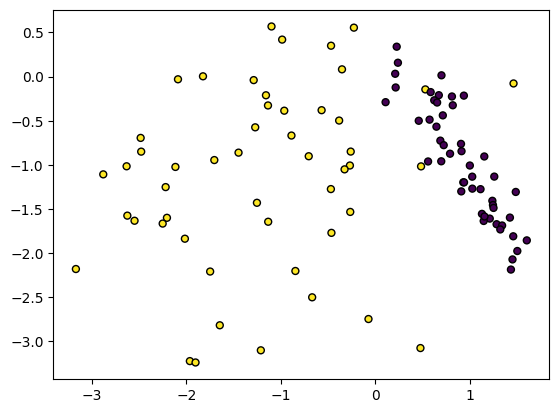

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, random_state=10, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2)
print(X_tr.shape,X_te.shape,y_tr.shape,y_te.shape)
print(y_te.T)


## Cost function for logistic regression

The first is a metric for how close the current label ( $\hat y$) is to the true gold
label $y$. Rather than measure similarity, we usually talk about the opposite of this:
the distance between the system output and the gold output, and we call this distance
loss the loss function or the cost function.

##cross-entropy loss

We need a loss function that expresses, for an observation $x$, how close the classifier
output ( $\hat{y} = σ(w·x+b)$) is to the correct output ($y$, which is 0 or 1). We’ll call this:

$L(\hat{y}, y)$ = How much $\hat{y}$ differs from the true $y$

We do this via a loss function that prefers the **correct class labels of the training examples to be more likely**. This is called **conditional maximum likelihood**
estimation: we choose the parameters $w,b$ that maximize the log probability of
the true $y$ labels in the training data given the observations $x$. The resulting loss
function is the negative log likelihood loss, generally called the cross-entropy loss.

We’d like to
learn weights that maximize the probability of the correct label $P(y|x)$.

Since there
are only two discrete outcomes (1 or 0), this is a Bernoulli distribution,

Here we need in logistic regression , $P(y=1|x) = \hat{y}$ and $P(y=0|x) = 1-\hat{y}$
\begin{align}
P(y|x) = \hat{y}^y(1-\hat{ y})^{(1-y)}
\end{align}
i.e. when $y=1, P(y|x) = \hat{y}$ and when $y=0, P(y|x) = 1-\hat{y}$
Now we take the log of both sides. This will turn out to be handy mathematically,
and doesn’t hurt us; whatever values maximize a probability will also maximize the
log of the probability:
\begin{align}
\log{P(y|x)} &= \log\left(\hat{y}^y(1-\hat{ y})^{(1-y)}\right)\\
&= y \log(\hat{y}) + (1-y) \log(1-\hat{y})
\end{align}

Instead of maximizing this, we minimize the negative log likelihood, which is nothing but the loss

\begin{align}
L(\hat{y},y) &= -\log\left(\hat{y}^y(1-\hat{ y})^{(1-y)}\right)\\
&= -y \log(\hat{y}) - (1-y) \log(1-\hat{y})
\end{align}

known as cross entropy loss

For $m$ nos. of samples , total **cross entropy loss or log-loss**
\begin{align}
J(\hat{y},y)
&= - \left[\sum_{i=1}^m y^{(i)} \log(\hat{y^{(i)}}) + (1-y^{(i)}) \log(1-\hat{y^{(i)}})\right]
\end{align}

For samples =2 , $y=1$ , $\log(\hat{y}) = h$

\begin{align}
J_1(\hat{y},y)
&= - \left[\sum_{i=1}^2 y^{(i)} \log(\hat{y^{(i)}}) \right] = -\left[ y^{(1)}\log(\hat{y^{(1)}}) + y^{(2)} \log(\hat{y^{(2)}})\right] = -\begin{bmatrix}y^{(1)} & y^{(2)}\end{bmatrix}\begin{bmatrix}\log(\hat{y^{(1)}}) \\ \log(\hat{y^{(2)}})\end{bmatrix}
\end{align}

Similarly For samples =2 , $y=0$ , $\log(1-\hat{y}) = g$
\begin{align}
J_0(\hat{y},y)
&= - \left[\sum_{i=1}^2 y^{(i)} \log(1-\hat{y^{(i)}}) \right] = -\left[ y^{(1)}\log(1-\hat{y^{(1)}})+ y^{(2)} \log(1-\hat{y^{(2)}})\right] = -\begin{bmatrix}y^{(1)} & y^{(2)}\end{bmatrix}\begin{bmatrix}\log(1-\hat{y^{(1)}}) \\ \log(1-\hat{y^{(2)}})\end{bmatrix}
\end{align}

Total cost
\begin{align}J(\hat{y},y) = J_1(\hat{y},y)  + J_0(\hat{y},y) \end{align}

## Write code for sigmoid function and cross entropy loss  
\begin{align}
\sigma(z) = \frac{1}{1+exp(-z)}
\end{align}

For $m$ nos. of samples , total **cross entropy loss or log-loss**
\begin{align}
J(\hat{y},y)
&= - \left[\sum_{i=1}^m y^{(i)} \log(\hat{y^{(i)}}) + (1-y^{(i)}) \log(1-\hat{y^{(i)}})\right]
\end{align}

In [ ]:
## calculation of cross entropy loss
# choose log base 2
import math
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    sig = np.minimum(sig, 0.999999999999)
    sig = np.maximum(sig, 0.000000000001)
    return sig
ytrue = np.array([1,1,0,0,1])
ypredict = np.array([1,1,1,0,1])
ypredict = np.clip(ypredict,1e-15,1-1e-15)

ccloss = -1/(ytrue.shape[0])*(np.dot(ytrue,np.log(ypredict)) +np.dot( 1-ytrue,np.log(1-ypredict)))
ccloss

6.907915198468176

Verify your result with the following

In [ ]:
def logloss(true_label, predicted, eps=1e-15):
  p = np.clip(predicted, eps, 1 - eps)
  if true_label == 1:
    return -np.log(p)
  else:
    return -np.log(1 - p)

ll = np.mean([logloss(x,y) for (x,y) in zip(ytrue, ypredict)])
print('Expected output : ',ll)

Expected output :  6.907915198468176


In [ ]:
from sklearn.metrics import log_loss
log_loss(ytrue,ypredict)

6.907915198468176

## Write code for cross entropy loss
m = total no. of samples
$$\mathbf{z = X\theta}$$
$$ \hat{\mathbf{y}} = \sigma{\mathbf{z}}$$
$$ Cost = -\frac{1}{m} \left( \mathbf{y}\cdot \log(\mathbf{\widehat{y}}) + (1-\mathbf{y})\cdot \log(1-\mathbf{\widehat{y}})\right)$$

In [ ]:

def cross_entropy_loss(X,ytrue,theta):
    z = np.dot(X,theta)
    ypredict = sigmoid(z)
    CEcost =-1/(ytrue.shape[0])*(np.dot(ytrue.T,np.log(ypredict)) +np.dot( 1-ytrue.T,np.log(1-ypredict)))
    return CEcost

## Code for Batch gradient descent

In [ ]:
LR = 0.01
INIT = 0
ITER = 1000

def logistic_regression_gradient_descent(X, y, learning_rate=LR, num_iterations=ITER):
    m, n = X.shape
    theta = np.zeros((n, 1)) - INIT
    costs = np.zeros((ITER,1))
    y = y.reshape(-1,1)
    for iteration in range(num_iterations):
        # Compute predictions
        predictions = sigmoid(X.dot(theta))

        # Compute error
        error = predictions - y

        # Compute gradients
        gradients = (1 / m) * X.T.dot(error)

        # Update parameters
        theta -= learning_rate * gradients

        # Compute cost
        cost = cross_entropy_loss(X,y,theta)

        costs[iteration,:] = cost

    return theta, costs


# Add bias term to X
X_tr_c = np.concatenate((np.ones((X_tr.shape[0], 1)), X_tr), axis=1)

# Compute theta using gradient descent
theta, costs = logistic_regression_gradient_descent(X_tr_c, y_tr)


print(theta,len(costs))



[[-0.06828545]
 [-1.81480354]
 [-0.23895451]] 1000


## Decision Boundary
##\begin{align}
\mathbf{z} = \mathbf{w.x+b}\\
P(y=1|x) = \sigma(\mathbf{z})\\
P(y=0|x) = 1-\sigma(\mathbf{z})\\
\text{choose class-1, if   }\quad  \sigma(\mathbf{z}) >0.5\\
\text{choose class-2, if   }\quad  \sigma(\mathbf{z}) <0.5\\
\text{or,}\\
\text{choose class-1, if}\quad z>0 \quad \text{i.e.}\quad \mathbf{w.x+b}>0\\
\text{choose class-2, if}\quad z<0 \quad \text{i.e.}\quad \mathbf{w.x+b}<0\\
\text{Decision Boundary} \quad \boxed{\mathbf{w.x+b}=0}\\
\boxed{\mathbf{x_2} = -\frac{w_1}{w_2}\mathbf{x_1} - \frac{b}{w_2}}
\end{align}

##Decision boundary can be obtained this way also:
###At decision boundary
## $$P(y=1|x)=P(y=0|x)$$
##\begin{align}
P(y=1|x) = \sigma(\mathbf{z})\\
P(y=0|x) = 1-\sigma(\mathbf{z})\\
\implies \sigma(\mathbf{z}) = 1-\sigma(\mathbf{z})\\
\implies \sigma(\mathbf{z}) = 0.5 \\
\implies \mathbf{z} = 0 \\
\implies \boxed{\mathbf{z = w.x+b}=0}
\end{align}


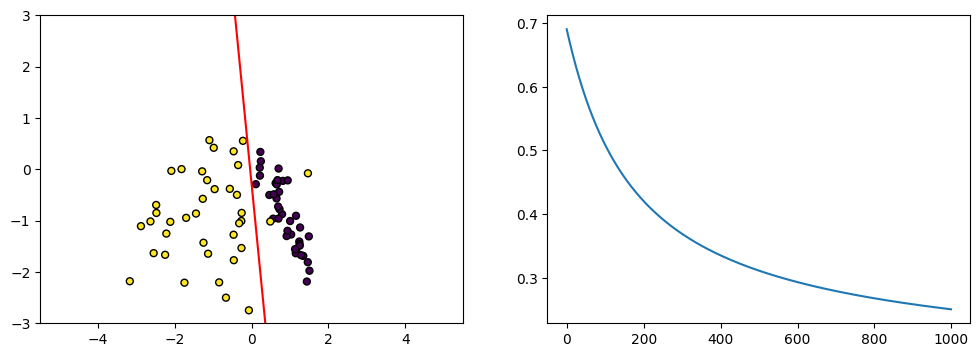

In [ ]:
x = np.linspace(-5,5,50)
x2 = -(theta[1]/theta[2])*x-(theta[0]/theta[2])


fig, ax = plt.subplots(1,2,figsize=(12, 4))

#Plot dataset
ax[0].scatter(X_tr[:,0], X_tr[:,1],marker="o", c=y_tr, s=25, edgecolor="k")

#Plot predictions as line of best fit
ax[0].plot( x,x2, c='r')
ax[0].set_ylim(-3, 3)


ax[1].plot(costs)

# Predict the unknown data

In [ ]:
def predict(X,theta):
  X_c = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
  yp = sigmoid(np.dot(X_c,theta))
  yp = (yp>0.5).astype(int)
  return yp

*italicized text*# Decision boundary with contour plot

(1509318, 1)
(1181, 1278)


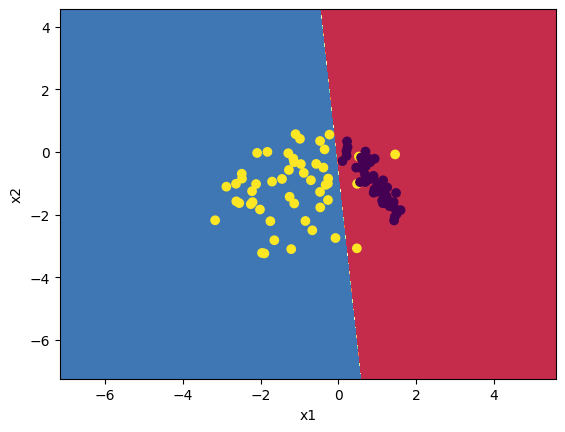

In [ ]:
 # Plotting Decision Boundary

 # Set min and max values and give it some padding
x_min, x_max = X[:,0].min() -4 , X[:,0].max() + 4
y_min, y_max = X[:,1].min() -4, X[:,1].max() + 4
h = 0.01
#print(X)
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid

Xn = (np.c_[xx.ravel(),yy.ravel()])

P = predict(Xn, theta)
print(P.shape)
P = P.reshape(xx.shape)
print(P.shape)
plt.contourf(xx, yy, P, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:,0], X[:,1], c = y)


#Classification report of our model

In [ ]:
# predict the test data
# Add bias term to X_test
#X_te_c = np.concatenate((np.ones((X_te.shape[0], 1)), X_te), axis=1)
yHat = predict(X_te,theta)

from sklearn.metrics import classification_report

target_names = ['class 1', 'class 2']
print(classification_report(y_te, yHat, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.91      1.00      0.95        10
     class 2       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



# Verify with Sklearn

[-0.10542218] [[-2.59517891]
 [-0.44984965]]
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         8
     class 2       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



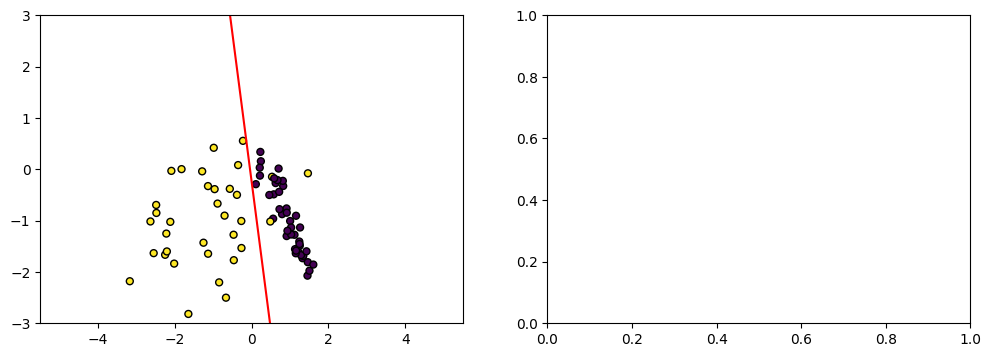

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_tr, y_tr)
w = clf.coef_.T
b = clf.intercept_
print(b,w)
fig, ax1 = plt.subplots(1,2,figsize=(12, 4))
#Plot dataset
ax1[0].scatter(X_tr[:,0], X_tr[:,1],marker="o", c=y_tr, s=25, edgecolor="k")
xx = np.linspace(-5,5,50)
x3 = -(w[0]/w[1])*xx - b/w[1]
#Plot predictions as line of best fit
ax1[0].plot( xx,x3, c='r')
ax1[0].set_ylim(-3,3)

## Classification report with sklearn
from sklearn.metrics import classification_report
yHat_sk = clf.predict(X_te)
target_names = ['class 1', 'class 2']
print(classification_report(y_te, yHat_sk, target_names=target_names))

# Logistic Regression with nonlinear decision boundary
## Two class case

##Example -1
`X,y = make_moons(n_samples=100,  shuffle=True, noise=0.1, random_state=0)`

`LR = 0.01
INIT = 0
ITER = 60000
polyDegree = 6`

(400, 2) (100, 2) (400,) (100,)
[0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0]


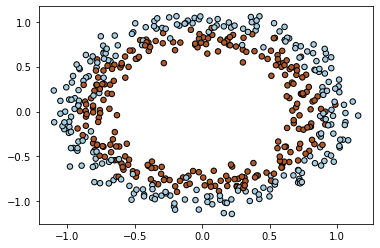

In [ ]:
from sklearn.datasets import make_circles, make_moons
X,y = make_circles(n_samples=500,  shuffle=True, noise=0.08, random_state=4, factor=0.8)
#X,y = make_moons(n_samples=100,  shuffle=True, noise=0.1, random_state=0)
# xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
# rng = np.random.RandomState(5)
# X = rng.randn(500, 2)
# y = (np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors=(0, 0, 0))
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2)
print(X_tr.shape,X_te.shape,y_tr.shape,y_te.shape)
print(y_te.T)



In [ ]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))

    return res

LR = 0.01
INIT = 0
ITER = 7000
polyDegree = 2

def logistic_regression_gradient_descent(X, y, learning_rate=LR, num_iterations=ITER):
    m, n = X.shape
    theta = np.zeros((n, 1)) - INIT
    costs = np.zeros((ITER,1))
    y = y.reshape(-1,1)
    for iteration in range(num_iterations):
        # Compute predictions
        predictions = sigmoid(X.dot(theta))

        # Compute error
        error = predictions - y

        # Compute gradients
        gradients = (1 / m) * X.T.dot(error)

        # Update parameters
        theta -= learning_rate * gradients

        # Compute cost
        cost = cross_entropy_loss(X,y,theta)

        costs[iteration,:] = cost

    return theta, costs

X_tr_map = mapFeature(X_tr[:,0],X_tr[:,1],polyDegree)

# Compute theta using gradient descent
theta, costs = logistic_regression_gradient_descent(X_tr_map, y_tr)

In [ ]:
def predict(X,theta):
 # X_c = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
  Xmap = mapFeature(X[:,0],X[:,1],polyDegree)
  yp = sigmoid(np.dot(Xmap,theta))
  yp = (yp>0.5).astype(int)
  return yp

(112209, 1)
(331, 339)


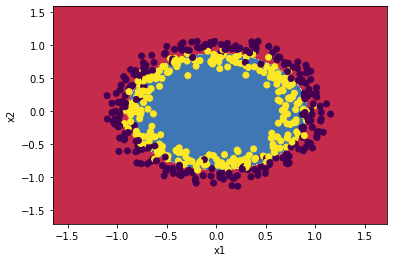

In [ ]:
# Plotting Decision Boundary

 # Set min and max values and give it some padding
x_min, x_max = X[:,0].min() + (X[:,0].min()/2) , X[:,0].max() + ( X[:,0].max()/2)
y_min, y_max = X[:,1].min() + (X[:,1].min()/2), X[:,1].max() + (X[:,1].max()/2)
h = 0.01
#print(X)
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid

Xn = (np.c_[xx.ravel(),yy.ravel()])
#Xn = mapFeature(Xn[:,0],Xn[:,1],polyDegree)
P = predict(Xn, theta)
print(P.shape)
P = P.reshape(xx.shape)
print(P.shape)
t = [10, 1]
plt.contourf(xx, yy, P, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:,0], X[:,1], c = y)
